<a href="https://colab.research.google.com/github/deeksha-punachithaya/XovexIT/blob/master/SpeechRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install -q kaggle

In [0]:
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c tensorflow-speech-recognition-challenge

 99% 1.04G/1.04G [00:25<00:00, 47.9MB/s]
100% 1.04G/1.04G [00:25<00:00, 44.0MB/s]
  0% 0.00/50.0 [00:00<?, ?B/s]
100% 50.0/50.0 [00:00<00:00, 42.0kB/s]
100% 2.45G/2.46G [00:46<00:00, 66.7MB/s]
100% 2.46G/2.46G [00:46<00:00, 56.6MB/s]
  0% 0.00/501k [00:00<?, ?B/s]
100% 501k/501k [00:00<00:00, 70.4MB/s]


In [0]:
! apt-get install dtrx
! dtrx /content/train.7z

In [0]:
! apt-get install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM, Activation
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import librosa
import numpy as np

Using TensorFlow backend.


In [0]:
# path = "./data/"
path = '/content/train/audio/'

MFCC's represent distinct units of sound or phonemes as the shape of the vocal tract

In [0]:
labels = os.listdir(path)

In [0]:
max_len = 11
# labels = os.listdir(path)
for label in labels:
    mfcc_vectors = []
    wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
    for wavfile in wavfiles:
        wav, _ = librosa.load(wavfile, mono=True, sr = None)
        wav = np.asfortranarray(wav[::3])
        mfcc = librosa.feature.mfcc(wav, sr=22050, n_mfcc=20)
        if (max_len > mfcc.shape[1]):
            pad_width = max_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_len]
        mfcc_vectors.append(mfcc)
    np.save(label + '.npy', mfcc_vectors)
    print(label)

In [0]:
print(labels, end = "")

['seven', 'down', 'cat', 'yes', '_background_noise_', 'no', 'on', 'dog', 'four', 'bed', 'go', 'off', 'happy', 'sheila', 'up', 'tree', 'marvin', 'left', 'bird', 'one', 'house', 'wow', 'two', 'three', 'zero', 'stop', 'six', 'nine', 'right', 'eight', 'five']

In [0]:
! apt-get install dtrx
! dtrx /content/test.7z

In [0]:
labels = ['seven', 'down', 'cat', 'yes', 'no', 'on', 'dog', 'four', 'bed', 'go', 'off', 'happy', 
          'sheila', 'up', 'tree', 'marvin', 'left', 'bird', 'one', 'house', 'wow', 'two', 'three', 
          'zero', 'stop', 'six', 'nine', 'right', 'eight', 'five']

In [0]:
label_indices = np.arange(0, len(labels))
label_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [0]:
X = np.load(labels[0] + '.npy')
y = np.zeros(X.shape[0])

for i, label in enumerate(labels[1:]):
    x = np.load(label + '.npy')
    X = np.vstack((X, x))
    y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

assert X.shape[0] == len(y)

In [0]:
X = X/255

In [0]:
#import cv2
#X1 = []
#for i in range(0, X.shape[0]):
#  X1.append(cv2.resize(X[i], (32,32), interpolation = cv2.INTER_AREA))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, shuffle=True)

In [0]:
X.shape

(64721, 20, 11)

In [0]:
y.shape

(64721,)

In [0]:
X_train.shape[0]

45304

In [0]:
X_train = X_train.reshape(X_train.shape[0], 20, 11, 1)
X_test = X_test.reshape(X_test.shape[0], 20, 11, 1)
X_train.shape

(45304, 20, 11, 1)

15.0
marvin


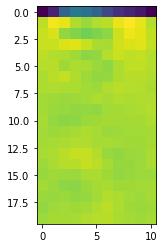

In [0]:
plt.imshow(X_train[105, :, :, 0])
print(y_train[105])
print(labels[int(y_train[105])])

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, input_shape=(20,11,1), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=3, activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,activation='relu',kernel_size=3,padding='same'))

model.add(Conv2D(64, kernel_size=3, activation = 'relu', padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=3, activation = 'relu', padding='same'))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(30, activation='softmax'))
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 20, 11, 64)        640       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 20, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 5, 64)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 5, 16)         9232      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 5, 64)         9280      
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 5, 64)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 5, 32)        

In [0]:
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs = 6, validation_data=(X_test, y_test))

Train on 45304 samples, validate on 19417 samples
Epoch 1/6
45304/45304 [==============================] - 8s 175us/step - loss: 0.4361 - accuracy: 0.8620 - val_loss: 0.5293 - val_accuracy: 0.8401
Epoch 2/6
45304/45304 [==============================] - 8s 175us/step - loss: 0.4105 - accuracy: 0.8671 - val_loss: 0.5040 - val_accuracy: 0.8482
Epoch 3/6
45304/45304 [==============================] - 8s 174us/step - loss: 0.3982 - accuracy: 0.8723 - val_loss: 0.5100 - val_accuracy: 0.8466
Epoch 4/6
45304/45304 [==============================] - 8s 174us/step - loss: 0.3840 - accuracy: 0.8751 - val_loss: 0.5265 - val_accuracy: 0.8445
Epoch 5/6
45304/45304 [==============================] - 8s 177us/step - loss: 0.3723 - accuracy: 0.8795 - val_loss: 0.5153 - val_accuracy: 0.8470
Epoch 6/6
45304/45304 [==============================] - 8s 178us/step - loss: 0.3629 - accuracy: 0.8822 - val_loss: 0.4981 - val_accuracy: 0.8497


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


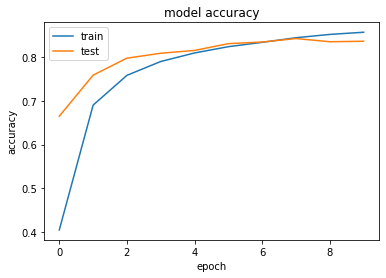

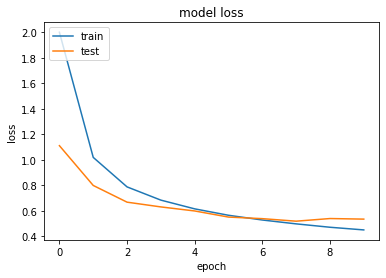

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model = Sequential()
model.add(Conv2D(64,activation='relu',kernel_size=3,input_shape=(20,11,1),padding='same')) #input_shape does not include batch_size
model.add(Conv2D(64,activation='relu',kernel_size=3,padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,activation='relu',kernel_size=3,padding='same'))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(30))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 20, 11, 64)        640       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 20, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 5, 64)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 5, 16)         9232      
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)               

In [0]:
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_test, y_test))

Train on 45304 samples, validate on 19417 samples
Epoch 1/10
45304/45304 [==============================] - 7s 153us/step - loss: 2.0799 - accuracy: 0.3955 - val_loss: 1.3538 - val_accuracy: 0.6070
Epoch 2/10
45304/45304 [==============================] - 7s 148us/step - loss: 1.1859 - accuracy: 0.6476 - val_loss: 0.9539 - val_accuracy: 0.7134
Epoch 3/10
45304/45304 [==============================] - 7s 148us/step - loss: 0.9119 - accuracy: 0.7261 - val_loss: 0.7615 - val_accuracy: 0.7752
Epoch 4/10
45304/45304 [==============================] - 7s 150us/step - loss: 0.7913 - accuracy: 0.7602 - val_loss: 0.7180 - val_accuracy: 0.7888
Epoch 5/10
45304/45304 [==============================] - 7s 147us/step - loss: 0.7117 - accuracy: 0.7847 - val_loss: 0.6587 - val_accuracy: 0.8054
Epoch 6/10
45304/45304 [==============================] - 7s 149us/step - loss: 0.6577 - accuracy: 0.8007 - val_loss: 0.6323 - val_accuracy: 0.8125
Epoch 7/10
45304/45304 [==============================] - 7s 1

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


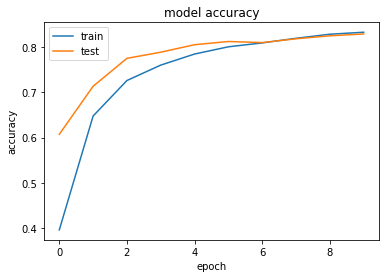

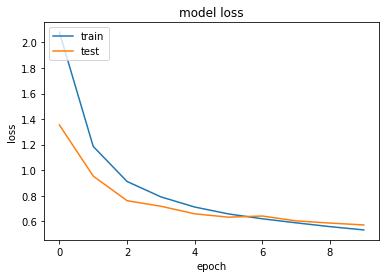

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
pred = model.predict(X_train[0].reshape(1,20,11,1))
print(pred.argmax())
print(labels[pred.argmax()])

0
seven


In [0]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Using SpeechRecognition api

In [0]:
import speech_recognition as sr
r = sr.Recognizer()
bird = sr.AudioFile('bird.wav')
with bird as source:
    audio = r.record(source)
type(audio)

speech_recognition.AudioData

In [0]:
r.recognize_google(audio)

'Bird'